In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import imageio
import numpy as np

Using TensorFlow backend.


In [4]:
cd '/content/drive/My Drive/IA_Tec/Dataset'

/content/drive/My Drive/IA_Tec/Dataset


In [5]:
train_path = 'Images'
train_test_datagen = ImageDataGenerator(validation_split=0.1)
train_batches = train_test_datagen.flow_from_directory(train_path, target_size=(224,224), classes=['Icepick','bat','brass_knuckles', 'handgun', 'knife','screwdriver','slingshot'], batch_size = 64, subset='training')
test_batches = train_test_datagen.flow_from_directory(train_path, target_size=(224,224), classes=['Icepick','bat','brass_knuckles', 'handgun', 'knife','screwdriver','slingshot'], batch_size = 32, subset='validation')

Found 12300 images belonging to 7 classes.
Found 1364 images belonging to 7 classes.


In [0]:
originalModel = MobileNetV2(input_shape=None, alpha=1.0, include_top=True, weights='imagenet', input_tensor=None, pooling=None)
originalModel.summary()












14540800/14536120 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
___

In [6]:
base_model = MobileNetV2(input_shape=(224,224,3), alpha=1.0, include_top=False, weights='imagenet', input_tensor=None, pooling=None)
base_model.summary()
# add a global spatial average pooling layer












9412608/9406464 [==============================] - 1s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_____

In [26]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
# x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 7 classes
predictions = Dense(7, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional  layers
for layer in base_model.layers:
    layer.trainable = True

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='Adamax', loss='logcosh',metrics=["accuracy"])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
____________________________________________________________________________________________

In [29]:
# train the model on the new data for a few epochs
history_warmup=model.fit_generator(train_batches, steps_per_epoch = train_batches.n/200, validation_data = test_batches, validation_steps=20,epochs=100, verbose=1, shuffle=True, use_multiprocessing=True, workers=10)
#model.save('/content/drive/My Drive/IA_Tec/Avances/Modelos/MobileNetv1_12k.h5')
history_warmup2=model.fit_generator(train_batches, steps_per_epoch = train_batches.n/200, validation_data = test_batches, validation_steps=20,epochs=200, verbose=1, shuffle=True, use_multiprocessing=True, workers=10, initial_epoch=100)
#model.save('/content/drive/My Drive/IA_Tec/Avances/Modelos/MobileNetv2_12k.h5')

# let's visualize layer names and layer indices to see how many layers
# we should freeze: 
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

Epoch 101/200
62/61 [==============================] - 47s 755ms/step - loss: 3.7358e-04 - acc: 0.9962 - val_loss: 0.0070 - val_acc: 0.9297
Epoch 102/200
62/61 [==============================] - 37s 600ms/step - loss: 2.6010e-04 - acc: 0.9977 - val_loss: 0.0073 - val_acc: 0.9313
Epoch 103/200
62/61 [==============================] - 38s 618ms/step - loss: 5.6358e-04 - acc: 0.9945 - val_loss: 0.0101 - val_acc: 0.9013
Epoch 104/200
62/61 [==============================] - 42s 679ms/step - loss: 1.8146e-04 - acc: 0.9987 - val_loss: 0.0078 - val_acc: 0.9313
Epoch 105/200
62/61 [==============================] - 38s 612ms/step - loss: 2.2755e-04 - acc: 0.9977 - val_loss: 0.0078 - val_acc: 0.9252
Epoch 106/200
62/61 [==============================] - 39s 634ms/step - loss: 2.8828e-04 - acc: 0.9975 - val_loss: 0.0081 - val_acc: 0.9234
Epoch 107/200
62/61 [==============================] - 42s 678ms/step - loss: 3.7720e-04 - acc: 0.9965 - val_loss: 0.0081 - val_acc: 0.9268
Epoch 108/200
62/61 

In [0]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('Loss Function')
    ax.grid(True)
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["acc"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_acc"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('Accuracy')
    ax.grid(True)

Test loss: 0.012530558664972583
Test accuracy: 0.8869047619047619


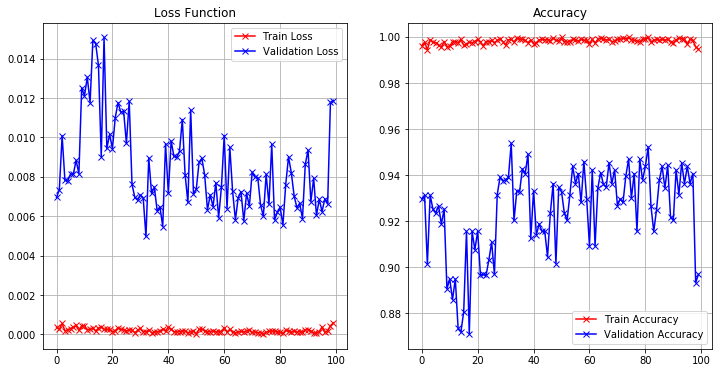

In [33]:
STEP_SIZE_VALID=test_batches.n//test_batches.batch_size
score = model.evaluate_generator(test_batches, steps=STEP_SIZE_VALID)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])
plot_loss_accuracy(history_warmup2)

In [0]:
# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 125 layers and unfreeze the rest:
for layer in model.layers[:125]:
   layer.trainable = False
for layer in model.layers[125:]:
   layer.trainable = True

# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=["accuracy"])
# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
history_lyr125=model.fit_generator(train_batches, steps_per_epoch = train_batches.n/100, validation_data = test_batches, validation_steps=20,epochs=200, verbose=1, shuffle=True, initial_epoch=100)

Epoch 101/200
58/57 [==============================] - 33s 572ms/step - loss: 0.0366 - acc: 0.9887 - val_loss: 3.2441 - val_acc: 0.2578
Epoch 102/200
58/57 [==============================] - 28s 479ms/step - loss: 0.0385 - acc: 0.9887 - val_loss: 3.7539 - val_acc: 0.2067
Epoch 103/200
58/57 [==============================] - 27s 465ms/step - loss: 0.0394 - acc: 0.9892 - val_loss: 3.5443 - val_acc: 0.2375
Epoch 104/200
58/57 [==============================] - 31s 527ms/step - loss: 0.0359 - acc: 0.9903 - val_loss: 3.4733 - val_acc: 0.2436
Epoch 105/200
58/57 [==============================] - 26s 452ms/step - loss: 0.0300 - acc: 0.9927 - val_loss: 3.5866 - val_acc: 0.2436
Epoch 106/200
20/57 [=========>....................] - ETA: 17s - loss: 0.0319 - acc: 0.9914

KeyboardInterrupt: ignored

Test loss: 1.4352172651598532
Test accuracy: 0.4475806451612903


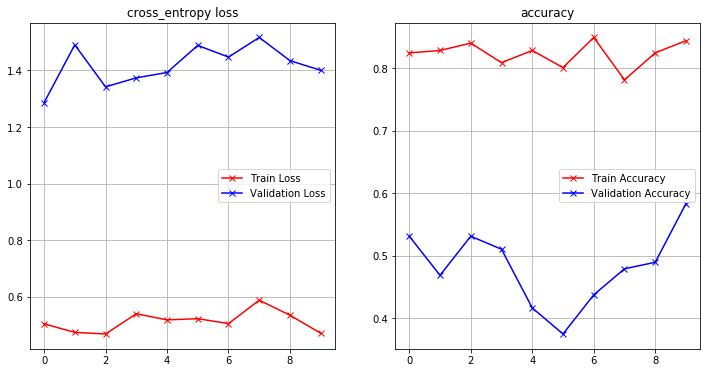

In [0]:
plot_loss_accuracy(historial_lyr125)
STEP_SIZE_VALID=test_batches.n//test_batches.batch_size
score = model.evaluate_generator(test_batches, steps=STEP_SIZE_VALID)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]) 

In [0]:
def onehot_toInt(labels_onehot):
    list1 = labels_onehot.tolist()
    max_index=list1.index(max(list1))
    if max(list1)<0.5:
      return len(list1)
    return max_index

# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(classes[onehot_toInt(titles[i])], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [0]:
classes=['Icepick','bat','brass_knuckles', 'handgun', 'knife','screwdriver','slingshot', 'NoPrediction']

In [0]:
test_imgs, test_labels = next(test_batches)

In [0]:
validation_x=[]
for i in range( test_batches.__len__() ):
    validation_x.extend(
        test_batches.__getitem__( i )[0] 
        )
validation_labels=test_batches.labels

4/4 [==============================] - 0s 33ms/step


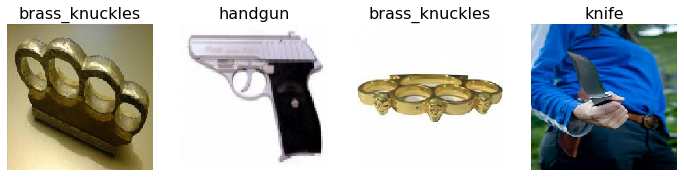

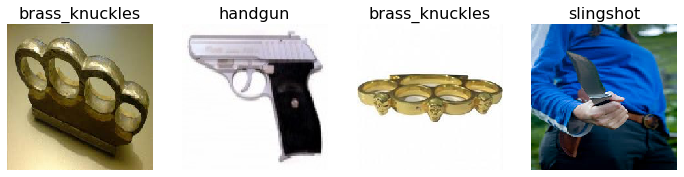

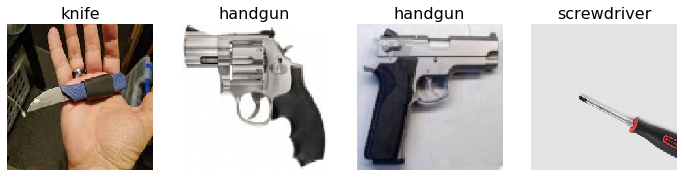

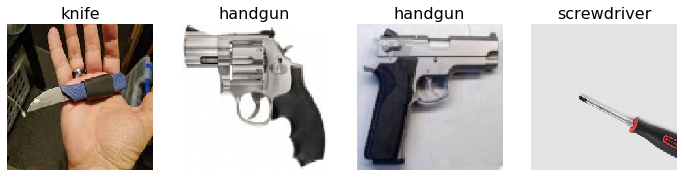

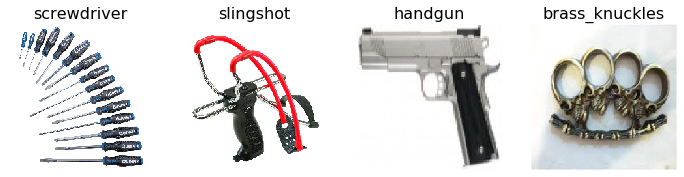

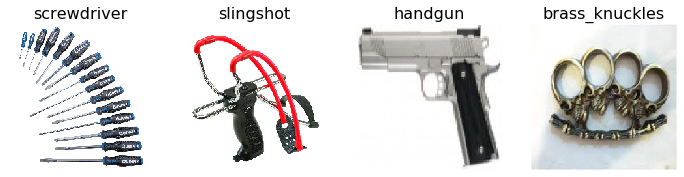

In [25]:
batchNum=21
test_imgs = test_batches[batchNum][0]
test_labels = test_batches[batchNum][1]
predictions = model.predict(test_batches[batchNum][0], steps=4,verbose=1)
for i in range(0, min(len(predictions),10), 4):
  plots(test_imgs[i:i+4], titles=test_labels[i:i+4])
  plots(test_imgs[i:i+4], titles=predictions[i:i+4])